In [1]:
import pandas as pd
model_csv_path = r'.cleanData.csv'

C:\Users\KIIT0001\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
dataSepsis = pd.read_csv(model_csv_path, sep=",")

In [4]:
Sepsis_counts = dataSepsis['SepsisLabel_max'].value_counts()
# it counts the number of instances for each unique value in the "SepsisLabel_max" column. This helps us understand how many individuals have or don't have sepsis.
# Calculate the percentage of each target class
# Gender_percentages = Gender_counts / len(data) * 100
# Explanation: In this line, we are calculating the percentage of each gender category within your dataset.
# we divide the counts in "Gender_counts" by the total number of instances in the "data" DataFrame (given by len(data)) and then multiply by 100 to express the result as a percentage.

In [5]:
Sepsis_percentages = Sepsis_counts / len(dataSepsis) * 100
# Explanation: Similarly, this line calculates the percentage of instances with and without sepsis in our dataset.
#It divides the counts in "Sepsis_counts" by the total number of instances in the "data"
# DataFrame and expresses the result as a percentage.

In [6]:
print(Sepsis_percentages)

SepsisLabel_max
0    92.731059
1     7.268941
Name: count, dtype: float64


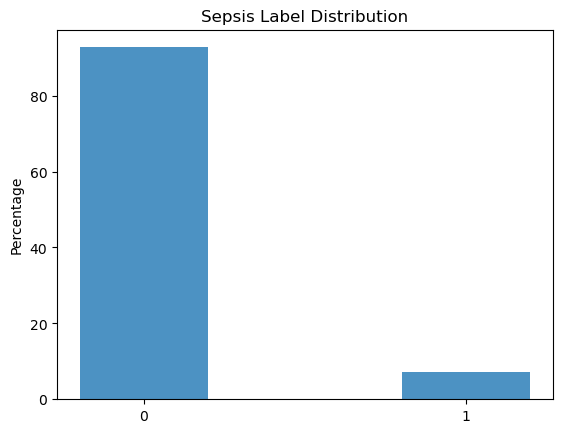

In [7]:
# Create a bar chart
fig, ax = plt.subplots()
# Explanation: In this line, we are creating a new figure ("fig") and a set of axes ("ax") for our plot.
# This is the starting point for creating our bar chart.
ax.bar(Sepsis_percentages.index, Sepsis_percentages.values, tick_label=Sepsis_percentages.index, width=0.4, align='center', alpha=0.8)
# Explanation: Here, we are using the "ax.bar" function to create a bar chart.we provide it with the x-values 
#(Sepsis label categories),
# y-values (Sepsis percentages), and other parameters to define how the bars should appear in the chart.
# These parameters include the width of the bars, alignment, and transparency (alpha).
ax.set_ylabel('Percentage')
# Explanation: This line sets the label for the y-axis of the bar chart. It's important for labeling and understanding the data being visualized.
ax.set_title('Sepsis Label Distribution')
# Explanation: Here, we are adding a title to the bar chart to describe what the chart represents.In this case,
#it's the distribution of sepsis labels.
#Show the plot
plt.show()
# Explanation: Finally, this line displays the bar chart you've created using the "plt.show()" function.
# It shows the chart in your Jupyter Notebook, allowing you to visualize the distribution of sepsis labels  in our dataset.

In [8]:
print (dataSepsis.columns)

Index(['Patient_ID', 'Hour_mean', 'HR_mean', 'HR_min', 'HR_max', 'HR_std',
       'O2Sat_mean', 'O2Sat_min', 'O2Sat_max', 'O2Sat_std', 'Temp_mean',
       'Temp_min', 'Temp_max', 'Temp_std', 'MAP_mean', 'MAP_min', 'MAP_max',
       'MAP_std', 'Resp_mean', 'Resp_min', 'Resp_max', 'Resp_std',
       'PaCO2_mean', 'PaCO2_min', 'PaCO2_max', 'PaCO2_std', 'FiO2_mean',
       'FiO2_min', 'FiO2_max', 'FiO2_std', 'SaO2_mean', 'SaO2_min', 'SaO2_max',
       'SaO2_std', 'AST_mean', 'AST_min', 'AST_max', 'AST_std', 'BUN_mean',
       'BUN_min', 'BUN_max', 'BUN_std', 'Creatinine_mean', 'Creatinine_min',
       'Creatinine_max', 'Creatinine_std', 'Glucose_mean', 'Glucose_min',
       'Glucose_max', 'Glucose_std', 'Hgb_mean', 'Hgb_min', 'Hgb_max',
       'Hgb_std', 'WBC_mean', 'WBC_min', 'WBC_max', 'WBC_std',
       'Platelets_mean', 'Platelets_min', 'Platelets_max', 'Platelets_std',
       'Bilirubin_total_mean', 'Bilirubin_total_min', 'Bilirubin_total_max',
       'Bilirubin_total_std', 'Age_mean',

In [9]:
data = pd.read_csv(model_csv_path, sep=",")
# Explanation: In this line, we are using the pandas library to read data from a CSV file located at r'.cleanData.csv'
# we are storing this data in a variable called "data."
# The sep="," parameter indicates that the values in the CSV file are separated by commas.

majority_class = data[data['SepsisLabel_max'] == 0]
minority_class = data[data['SepsisLabel_max'] == 1]
# Explanation: After reading the data, we are splitting it into two classes based on the values in the
# "SepsisLabel_max" column. The "majority_class" variable contains instances where the "SepsisLabel_max"
# is 0, and the "minority_class" variable contains instances where the "SepsisLabel_max" is 1.

print('number of sepsis label 1 is {}'.format(len(minority_class)))
print('while number of sepsis label 0 is {}'.format(len(majority_class)))
# Explanation: we are printing the number of instances in each class. The first print statement tells
# how many instances have a "SepsisLabel_max" of 1, and the second print statement tells how many
# instances have a "SepsisLabel_max" of 0. This is important for understanding the class distribution in our dataset,
#which can be crucial for machine learning tasks, especially in cases of imbalanced datasets.

number of sepsis label 1 is 2932
while number of sepsis label 0 is 37404


In [10]:
# Undersampling

majority_class_subset = majority_class.sample(n=2*len(minority_class))
# Explanation: In this line, we are creating a subset of the majority class (the class with more instances)
# from our data. we use the .sample() function to randomly select a number of instances.
# The n=2*len(minority_class) parameter determines that want to sample a number of instances twice the size of the minority class.

data = pd.concat([majority_class_subset, minority_class])
# Explanation: Here, we are concatenating (combining) the "majority_class_subset" and "minority_class"
# dataframes to create a single "data" dataframe. This operation brings together the sampled majority class
# instances and all the minority class instances, allowing us to create a more balanced dataset.
# Balancing the dataset is often done to prevent class imbalance issues when training machine learning models.

In [11]:
Sepsis_counts = data['SepsisLabel_max'].value_counts()
# Explanation: In this line, we are counting the number of instances for each unique value in the
# "SepsisLabel_max" column of the "data" DataFrame. This is a way to determine the distribution of sepsis
# labels in your updated dataset, which now includes a balanced number of instances from the majority and minority classes.

Sepsis_percentages = Sepsis_counts / len(data) * 100
# Explanation: Similar to previous lines, here we are calculating the percentages of each sepsis label in our dataset.
#we divide the counts in "Sepsis_counts" by the total number of instances in the "data" 
#DataFrame and multiply by 100 to express the result as a percentage.

print(Sepsis_percentages)
# Explanation: This line prints the percentages of each sepsis label to the console.
# These percentages reflect the distribution of sepsis labels in our updated dataset, which we balanced
# by oversampling the minority class. Balancing the dataset can be important for training machine learning models,
#  as it prevents one class from dominating the training process.

SepsisLabel_max
0    66.666667
1    33.333333
Name: count, dtype: float64


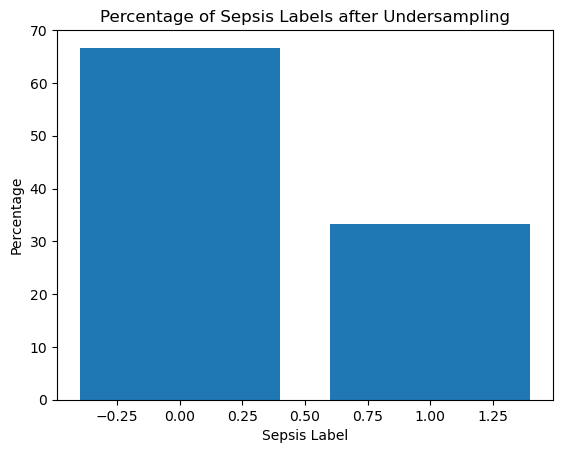

In [12]:
plt.bar(Sepsis_counts.index, Sepsis_percentages)
# Explanation: In this line, we are using the "plt.bar" function to create a bar chart.
# we are providing it with the x-values (Sepsis label categories) and y-values (Sepsis percentages) to
# represent the distribution of sepsis labels after undersampling the dataset.
# This chart visually displays the percentage of each sepsis label in the balanced dataset.
plt.title("Percentage of Sepsis Labels after Undersampling")
# Explanation: Here, we are adding a title to the bar chart to describe what the chart represents.
# In this case, it's the percentage of sepsis labels in the dataset after undersampling.
plt.xlabel("Sepsis Label")
# Explanation: This line sets the label for the x-axis of the bar chart, which specifies the type of data
# or categories being represented.
plt.ylabel("Percentage")
# Explanation: Similarly, this line sets the label for the y-axis of the bar chart.
# It provides information about the measurement represented on the y-axis, which, in this case, is the percentage.
plt.show()
# Explanation: Finally, this line displays the bar chart you've created using the "plt.show()" function.
# It shows the chart in your Jupyter Notebook, allowing you to visualize the percentage distribution of
# sepsis labels after undersampling the dataset. This type of visualization is helpful for understanding
# the class balance in our dataset, which is crucial for machine learning tasks.

In [13]:
print (dataSepsis.columns)

Index(['Patient_ID', 'Hour_mean', 'HR_mean', 'HR_min', 'HR_max', 'HR_std',
       'O2Sat_mean', 'O2Sat_min', 'O2Sat_max', 'O2Sat_std', 'Temp_mean',
       'Temp_min', 'Temp_max', 'Temp_std', 'MAP_mean', 'MAP_min', 'MAP_max',
       'MAP_std', 'Resp_mean', 'Resp_min', 'Resp_max', 'Resp_std',
       'PaCO2_mean', 'PaCO2_min', 'PaCO2_max', 'PaCO2_std', 'FiO2_mean',
       'FiO2_min', 'FiO2_max', 'FiO2_std', 'SaO2_mean', 'SaO2_min', 'SaO2_max',
       'SaO2_std', 'AST_mean', 'AST_min', 'AST_max', 'AST_std', 'BUN_mean',
       'BUN_min', 'BUN_max', 'BUN_std', 'Creatinine_mean', 'Creatinine_min',
       'Creatinine_max', 'Creatinine_std', 'Glucose_mean', 'Glucose_min',
       'Glucose_max', 'Glucose_std', 'Hgb_mean', 'Hgb_min', 'Hgb_max',
       'Hgb_std', 'WBC_mean', 'WBC_min', 'WBC_max', 'WBC_std',
       'Platelets_mean', 'Platelets_min', 'Platelets_max', 'Platelets_std',
       'Bilirubin_total_mean', 'Bilirubin_total_min', 'Bilirubin_total_max',
       'Bilirubin_total_std', 'Age_mean',

LOGISTIC REGRESSION

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
# This part imports libraries for working with machine learning, including logistic regression, data splitting, cross-validation, and model evaluation.
# It also suppresses warning messages to keep the output clean.
# Separate features and target variables
X = data.drop('SepsisLabel_max', axis=1)
y = data['SepsisLabel_max']
# Here, we are defining the feature variables (X) and the target variable (y) for our machine learning model. 
#we use the "SepsisLabel_max" column as the target variable, and all other columns in our
# dataset are used as features.
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)
# split our data into training, validation, and testing sets using the train_test_split function.
# The data is divided such that 70% is used for training, 20% for validation, and 10% for testing.
# The random_state parameter ensures reproducibility.

# Define the logistic regression model
clf = LogisticRegression(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Perform grid search using 5-fold cross-validation on the training set
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# we use grid search to find the best hyperparameters for the logistic regression model.
# The grid search involves five-fold cross-validation to evaluate different hyperparameter combinations.

# Print the best hyperparameters and score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Train the model on the training set with the best hyperparameters
clf_best = LogisticRegression(C=grid_search.best_params_['C'], random_state=42)
clf_best.fit(X_train, y_train)
y_pred_val = clf_best.predict(X_val)
LR_acc_val = accuracy_score(y_val, y_pred_val)
print('Accuracy on validation set:', LR_acc_val)
print(classification_report(y_val, y_pred_val))
# Explaination :  make predictions on the validation set and evaluate the model's accuracy and generate a classification report.

# Evaluate the model performance on the testing set
y_pred_test = clf_best.predict(X_test)
LR_acc_test = accuracy_score(y_test, y_pred_test)
print('Accuracy on testing set:', LR_acc_test)
print(classification_report(y_test, y_pred_test))

Best hyperparameters: {'C': 10}
Best score: 0.7366497461928934
Accuracy on validation set: 0.7256493506493507
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       782
           1       0.74      0.38      0.50       450

    accuracy                           0.73      1232
   macro avg       0.73      0.65      0.66      1232
weighted avg       0.73      0.73      0.70      1232

Accuracy on testing set: 0.7415687760515347
              precision    recall  f1-score   support

           0       0.75      0.92      0.83      1759
           1       0.71      0.38      0.49       880

    accuracy                           0.74      2639
   macro avg       0.73      0.65      0.66      2639
weighted avg       0.74      0.74      0.72      2639



NAIVE BAYES

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the Naive Bayes classifier
clf = GaussianNB()

# Define the hyperparameter grid to search over
param_grid = {'var_smoothing': [1e-10, 1e-9, 1e-8]}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Train the model on the training data with the best hyperparameters
clf_best = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing'])
clf_best.fit(X_train, y_train)
# Make predictions on the validation set
y_pred_val = clf_best.predict(X_val)

# Evaluate the model performance on the validation set
NB_acc_val = accuracy_score(y_val, y_pred_val)

# Make predictions on the testing data
y_pred_test = clf_best.predict(X_test)

# Evaluate the model performance on the testing set
NB_acc_test = accuracy_score(y_test, y_pred_test)

# Print the validation and testing accuracy and classification report
print('Validation Accuracy:',NB_acc_val)
print(classification_report(y_val, y_pred_val))

print('Testing Accuracy:', NB_acc_test)
print(classification_report(y_test, y_pred_test))


Best hyperparameters: {'var_smoothing': 1e-09}
Best score: 0.7624365482233504
Validation Accuracy: 0.7613636363636364
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       782
           1       0.79      0.48      0.59       450

    accuracy                           0.76      1232
   macro avg       0.77      0.70      0.71      1232
weighted avg       0.77      0.76      0.74      1232

Testing Accuracy: 0.7552103069344449
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1759
           1       0.73      0.42      0.54       880

    accuracy                           0.76      2639
   macro avg       0.75      0.67      0.68      2639
weighted avg       0.75      0.76      0.73      2639



SUPPORT VECTOR MACHINE

In [16]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
clf = SVC(kernel='rbf',C=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Make predictions on the validation set
y_pred_val = clf.predict(X_val)
# Evaluate the model performance on the validation set
SVM_acc_val = accuracy_score(y_val, y_pred_val)
# Make predictions on the testing data
y_pred_test = clf.predict(X_test)
# Evaluate the model performance on the testing set
SVM_acc_test = accuracy_score(y_test, y_pred_test)
print('Validation Accuracy:', SVM_acc_val)
print(classification_report(y_val, y_pred_val))

print('Testing Accuracy:', SVM_acc_test)
print(classification_report(y_test, y_pred_test))

Validation Accuracy: 0.6347402597402597
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       782
           1       0.00      0.00      0.00       450

    accuracy                           0.63      1232
   macro avg       0.32      0.50      0.39      1232
weighted avg       0.40      0.63      0.49      1232

Testing Accuracy: 0.6665403561955286
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1759
           1       0.00      0.00      0.00       880

    accuracy                           0.67      2639
   macro avg       0.33      0.50      0.40      2639
weighted avg       0.44      0.67      0.53      2639



RANDOM FOREST

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Train a Random Forest classifier on the training data
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = rfc.predict(X_val)

# Evaluate the model performance on the validation set
RF_acc_val = accuracy_score(y_val, y_pred_val)
print('Validation Accuracy:', RF_acc_val)
print(classification_report(y_val, y_pred_val))

# Make predictions on the testing set
y_pred_test = rfc.predict(X_test)

# Evaluate the model performance on the testing set
RF_acc_test = accuracy_score(y_test, y_pred_test)
print('Testing Accuracy:', RF_acc_test)
print(classification_report(y_test, y_pred_test))

Validation Accuracy: 0.8563311688311688
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       782
           1       0.90      0.68      0.78       450

    accuracy                           0.86      1232
   macro avg       0.87      0.82      0.84      1232
weighted avg       0.86      0.86      0.85      1232

Testing Accuracy: 0.8681318681318682
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1759
           1       0.90      0.68      0.78       880

    accuracy                           0.87      2639
   macro avg       0.88      0.82      0.84      2639
weighted avg       0.87      0.87      0.86      2639



In [18]:
X_train.count()

Patient_ID           4925
Hour_mean            4925
HR_mean              4925
HR_min               4925
HR_max               4925
                     ... 
Age_mean             4925
Gender_first         4925
HospAdmTime_first    4925
ICULOS_max           4925
Unit_first           4925
Length: 71, dtype: int64

COMPARISON OF ACCURACY

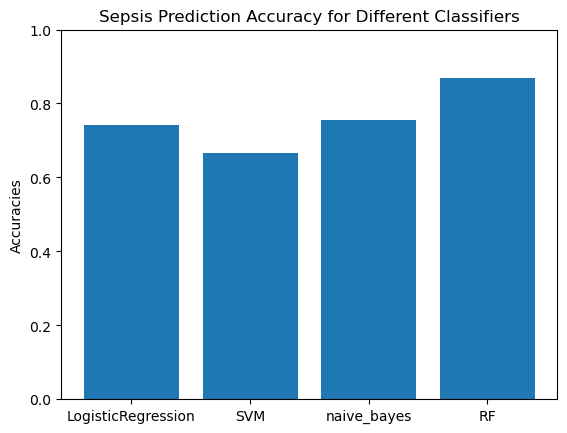

In [19]:
classifiers = ['LogisticRegression', 'SVM', 'naive_bayes','RF']
accuracies = [LR_acc_test, SVM_acc_test, NB_acc_test, RF_acc_test]

plt.bar(classifiers, accuracies)
plt.ylim([0,1])
plt.ylabel('Accuracies')
plt.title('Sepsis Prediction Accuracy for Different Classifiers')
plt.show()

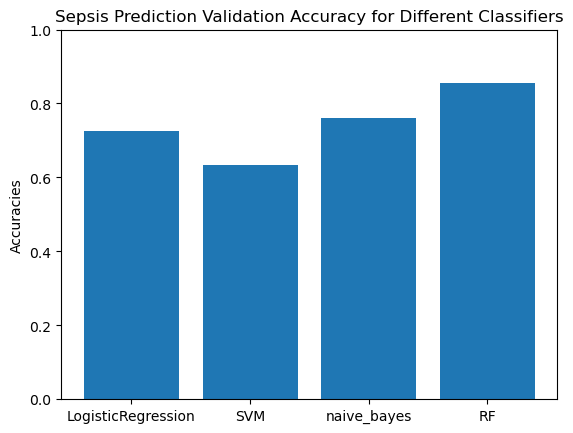

In [20]:
classifiers = ['LogisticRegression', 'SVM', 'naive_bayes','RF']
accuracies = [LR_acc_val, SVM_acc_val, NB_acc_val, RF_acc_val]

plt.bar(classifiers, accuracies)
plt.ylim([0,1])
plt.ylabel('Accuracies')
plt.title('Sepsis Prediction Validation Accuracy for Different Classifiers')
plt.show()

In [21]:
#Save file for project development
import pickle

# dump information to that file
pickle.dump(rfc, open('step2_output_model.pkl', 'wb'))

In [22]:
import pandas as pd
import numpy as np
import joblib  # or just import joblib if we are using a recent version

model_path = 'step2_output_model.pkl'  # Update this path
model = joblib.load(model_path)

features_no_sepsis_new = [
    3,  # Patient_ID (unique identifier)
   36,
    7.2,
    0,
    0.03,
    17,
    28,

    3,  
   36,
    7.2,
    0,
    0.03,
    17,
    28,
        3,  
   36,
    7.2,
    0,
    0.03,
    17,
    28,
        3,  
   36,
    7.2,
    0,
    0.03,
    17,
    28,
        3,  
   36,
    7.2,
    0,
    0.03,
    17,
    28,
        3,  
   36,
    7.2,
    0,
    0.03,
    17,
    28,
        3,  
   36,
    7.2,
    0,
    0.03,
    17,
    28,
        3,  
   36,
    7.2,
    0,
    0.03,
    17,
    28,
        3,  
   36,
    7.2,
    0,
    0.03,
    17,
    28,
        3,  
   36,
    7.2,
    0,
    0.03,
    17,
    28,
    0
]

# Assuming the necessary imports and model loading have been done
feature_vector_no_sepsis_new = np.array(features_no_sepsis_new).reshape(1, -1)

# Make a prediction using the new feature vector
prediction_new = model.predict(feature_vector_no_sepsis_new)

# Interpret the new prediction
prediction_result_new = "Sepsis" if prediction_new[0] == 1 else "No Sepsis"
print(f"New Prediction: {prediction_result_new}")

New Prediction: Sepsis
